Data description �e-shop clothing 2008�

Variables:

1. YEAR (2008)

========================================================

2. MONTH -> from April (4) to August (8)

========================================================

3. DAY -> day number of the month

========================================================

4. ORDER -> sequence of clicks during one session

========================================================

5. COUNTRY -> variable indicating the country of origin of the IP address with the 
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)

========================================================

6. SESSION ID -> variable indicating session id (short record)

========================================================

7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

========================================================

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product 
(217 products)

========================================================

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white

========================================================

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right

========================================================

11. MODEL PHOTOGRAPHY -> variable with two categories: 

1-en face
2-profile

========================================================

12. PRICE -> price in US dollars

========================================================

13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

1-yes
2-no

========================================================

14. PAGE -> page number within the e-store website (from 1 to 5)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

If you use this dataset, please cite:

�apczy�ski M., Bia�ow�s S. (2013) Discovering Patterns of Users' Behaviour in an E-shop - 
Comparison of Consumer Buying Behaviours in Poland and Other European Countries, 
�Studia Ekonomiczne�, nr 151, �La soci�t� de l'information : perspective europ�enne et 
globale : les usages et les risques d'Internet pour les citoyens et les consommateurs�, p. 144-
153.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [38]:
#Clickstream analysis
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv(r'C:\Users\Nauel\Desktop\Python\Project click stream\e-shop clothing 2008.csv')
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


### Countries distribution

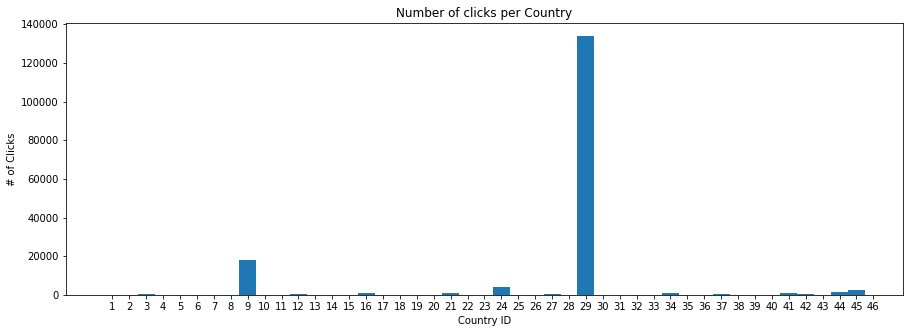

In [225]:
plt.figure(figsize=(15,5))
plt.title("Number of clicks per Country")
plt.xlabel("Country ID")
plt.ylabel("# of Clicks")
plt.hist(df.country, bins= list(range(1, 47)),align="left")
plt.xticks(list(range(1, 47)))
plt.show()

133963
18003
31511


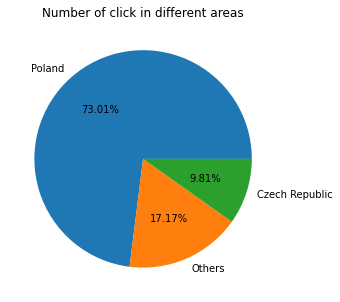

In [40]:
poland=df.loc[df['country'] == 29].count()[0]
print (poland)
cz=df.loc[df['country'] == 9].count()[0]
print(cz)
others=df.loc[df['country'] != 29].count()[0]
print(others)

labels=["Poland","Others","Czech Republic"]
plt.figure(figsize=(15,5))
plt.title("Number of click in different areas")
plt.pie([poland, others,cz],labels=labels, autopct = "%.2f%%")
plt.show()

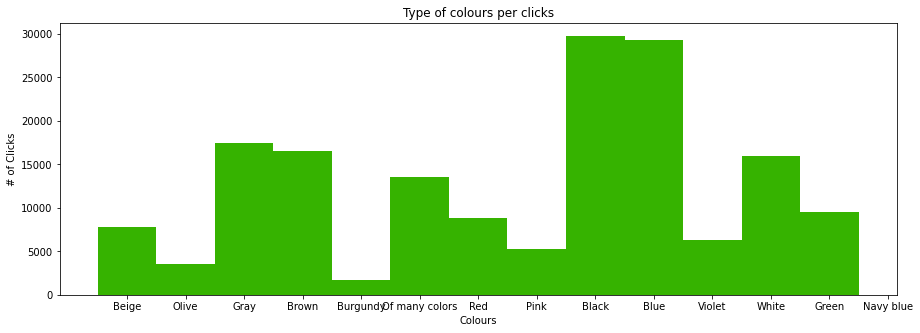

Black             0.179871
Blue              0.176819
Gray              0.105612
Brown             0.099816
White             0.096323
Of many colors    0.081771
Red               0.053362
Beige             0.047047
Green             0.041553
Violet            0.038042
Pink              0.031981
Olive             0.021629
Navy blue         0.016099
Burgundy          0.010074
Name: colour, dtype: float64

In [229]:
df.colour.replace({1 : "Beige", 2 : "Black", 3 : "Blue", 4 : "Brown", 5 : "Burgundy", 6 : "Gray", 7 : "Green", 8 : "Navy blue", 9 : "Of many colors", 10 : "Olive", 11 : "Pink", 12 : "Red", 13 : "Violet", 14 : "White"}, inplace=True)

plt.figure(figsize=(15,5))
plt.title("Type of colours per clicks")
plt.xlabel("Colours")
plt.ylabel("# of Clicks")
plt.hist(df.colour, bins=range(0,14, 1), color="#36b300", align="left")
plt.show()
df['colour'].value_counts(normalize =True)

# Number of Single visitors

In [42]:
df['session ID'].nunique()

24026

In [43]:
df1=df.drop_duplicates(subset=['session ID'], keep='first')
df1

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,Beige,5,1,28,2,1
9,2008,4,1,1,29,2,2,B31,Of many colors,5,1,57,1,2
19,2008,4,1,1,21,3,2,B17,Gray,6,2,38,2,1
25,2008,4,1,1,21,4,1,A34,Black,6,1,38,2,2
29,2008,4,1,1,9,5,3,C21,White,1,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165459,2008,8,13,1,29,24022,1,A1,Navy blue,1,1,28,2,1
165462,2008,8,13,1,29,24023,1,A10,Blue,4,1,38,2,1
165469,2008,8,13,1,29,24024,2,B10,Black,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,Blue,4,1,62,1,1


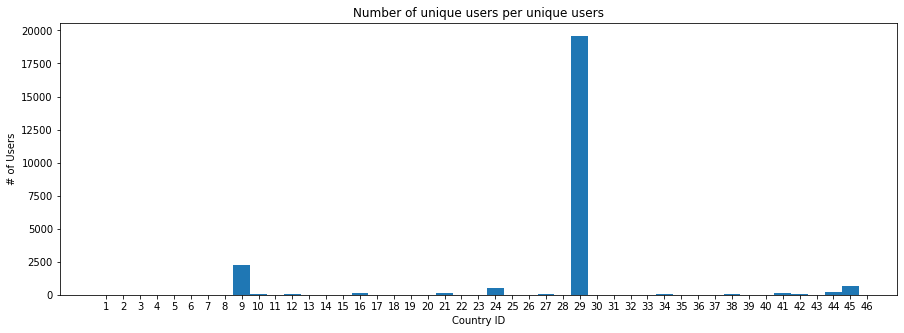

In [227]:
plt.figure(figsize=(15,5))
plt.title("Number of unique users per unique users")
plt.xlabel("Country ID")
plt.ylabel("# of Users")
plt.hist(df1.country, bins= list(range(1, 47)),align="left")
plt.xticks(list(range(1, 47)))
plt.show()

19582
2261
4444


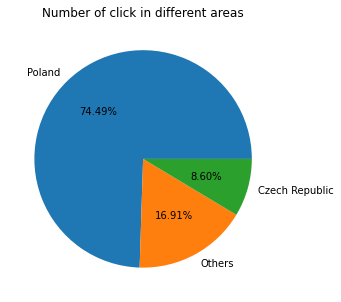

In [45]:
poland1=df1.loc[df1['country'] == 29].count()[0]
print (poland1)
cz1=df1.loc[df1['country'] == 9].count()[0]
print(cz1)
others1=df1.loc[df1['country'] != 29].count()[0]
print(others1)

labels=["Poland","Others","Czech Republic"]
plt.figure(figsize=(15,5))
plt.title("Number of click in different areas")
plt.pie([poland1, others1,cz1],labels=labels, autopct = "%.2f%%")
plt.show()

### Still, Poland is the main country of origin of the users

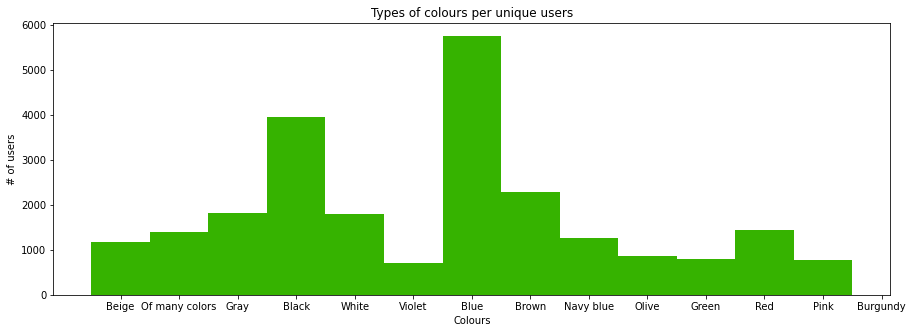

Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64

In [228]:
plt.figure(figsize=(15,5))
plt.title("Types of colours per unique users")
plt.xlabel("Colours")
plt.ylabel("# of users")
plt.hist(df1.colour, bins=range(0,14,1), color="#36b300", align="left")
plt.show()
df1['colour'].value_counts(normalize =True)

### We can see that even though the numer of unique visitors are higher for the Blue colour, then the visitors spend more clicks on pages with clothes of Black colour

In [47]:
colourclick=df['colour'].value_counts(normalize=True)
colourusers=df1['colour'].value_counts(normalize=True)
print(colourclick)
print(colourusers)

Black             0.179871
Blue              0.176819
Gray              0.105612
Brown             0.099816
White             0.096323
Of many colors    0.081771
Red               0.053362
Beige             0.047047
Green             0.041553
Violet            0.038042
Pink              0.031981
Olive             0.021629
Navy blue         0.016099
Burgundy          0.010074
Name: colour, dtype: float64
Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64


9247
6472
4445
3862
4445
3862


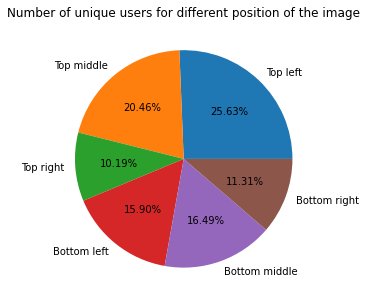

In [48]:
tleft=df1.loc[df1["location"] == 1].count()[0]
print (trousers)
tmiddle=df1.loc[df1["location"] == 2].count()[0]
print(skirt)
tright=df1.loc[df1["location"] == 3].count()[0]
print(blouses)
bleft=df1.loc[df1["location"] == 4].count()[0]
print(sale)
bmiddle=df1.loc[df1["location"] == 5].count()[0]
print(blouses)
bright=df1.loc[df1["location"] == 6].count()[0]
print(sale)

labels=["Top left","Top middle","Top right","Bottom left", "Bottom middle", "Bottom right"]
plt.figure(figsize=(15,5))
plt.title("Number of unique users for different position of the image")
plt.pie([tleft, tmiddle,tright,bleft,bmiddle,bright],labels=labels, autopct = "%.2f%%")
plt.show()

9247
6472
4445
3862
4445
3862


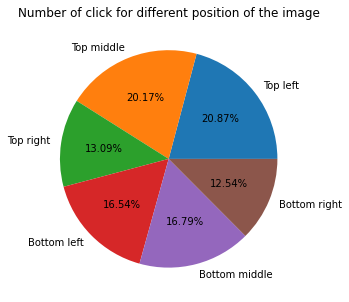

In [49]:
tleft=df.loc[df["location"] == 1].count()[0]
print (trousers)
tmiddle=df.loc[df["location"] == 2].count()[0]
print(skirt)
tright=df.loc[df["location"] == 3].count()[0]
print(blouses)
bleft=df.loc[df["location"] == 4].count()[0]
print(sale)
bmiddle=df.loc[df["location"] == 5].count()[0]
print(blouses)
bright=df.loc[df["location"] == 6].count()[0]
print(sale)

labels=["Top left","Top middle","Top right","Bottom left", "Bottom middle", "Bottom right"]
plt.figure(figsize=(15,5))
plt.title("Number of click for different position of the image")
plt.pie([tleft, tmiddle,tright,bleft,bmiddle,bright],labels=labels, autopct = "%.2f%%")
plt.show()

9247
6472
4445
3862


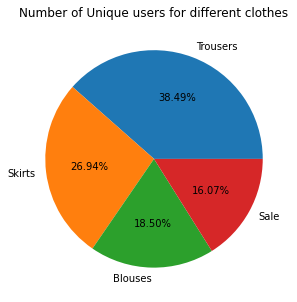

In [50]:
trousers=df1.loc[df1["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df1.loc[df1["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df1.loc[df1["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df1.loc[df1["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()


### The difference btw the two may represent the fact that unique users probably prefers to look at trousers, but then their spend much less time on pages with this type of clothes. While for other types of clothes users spend usually more time, probably this may be determined by the fact that users gives more importance to this type of clothes and so they look carefully at the page to find all the detailes related to the cloth.

In [51]:
df['page 2 (clothing model)'].value_counts(normalize =True)

B4     0.021629
A2     0.018208
A11    0.016855
P1     0.016202
B10    0.015507
         ...   
P66    0.000278
P22    0.000012
P79    0.000012
P54    0.000006
P28    0.000006
Name: page 2 (clothing model), Length: 217, dtype: float64

In [52]:
df['model photography'].value_counts(normalize =True)

1    0.739929
2    0.260071
Name: model photography, dtype: float64

9247
6472
4445
3862


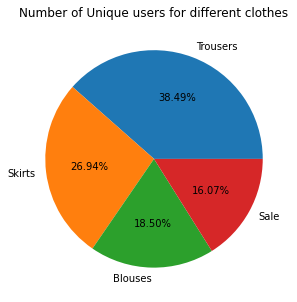

In [53]:
df1['location'].value_counts(normalize =True)
trousers=df1.loc[df1["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df1.loc[df1["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df1.loc[df1["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df1.loc[df1["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

9247
6472


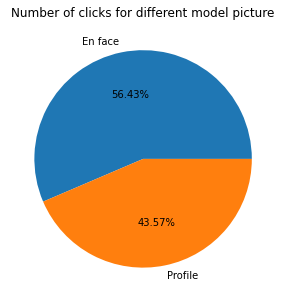

In [54]:
df['price 2'].value_counts(normalize =True)

enface=df.loc[df["page 1 (main category)"] == 1].count()[0]
print (trousers)
profile=df.loc[df["page 1 (main category)"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of clicks for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

34
27


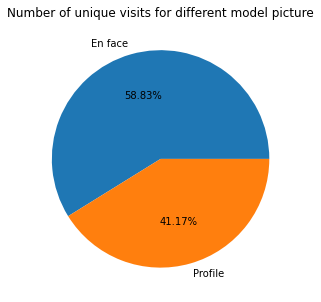

In [224]:
df1['price 2'].value_counts(normalize =True)

enface=df1.loc[df1["page 1 (main category)"] == 1].count()[0]
print (trousers)
profile=df1.loc[df1["page 1 (main category)"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visits for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

In [56]:
df2=df.drop_duplicates(subset=['session ID'], keep='last')
df2

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
8,2008,4,1,9,29,1,4,P82,Gray,4,2,48,1,5
18,2008,4,1,10,29,2,4,P33,Of many colors,5,1,43,1,2
24,2008,4,1,6,21,3,4,P77,Green,2,1,43,1,5
28,2008,4,1,4,21,4,3,C25,Black,3,1,33,2,2
29,2008,4,1,1,9,5,3,C21,White,1,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165461,2008,8,13,3,29,24022,1,A15,White,5,2,33,2,1
165468,2008,8,13,7,29,24023,4,P13,Brown,5,1,38,1,1
165469,2008,8,13,1,29,24024,2,B10,Black,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,Blue,4,1,62,1,1


count    24026.000000
mean         6.887289
std          8.995161
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        195.000000
Name: order, dtype: float64
4.0
6.8872887704986265


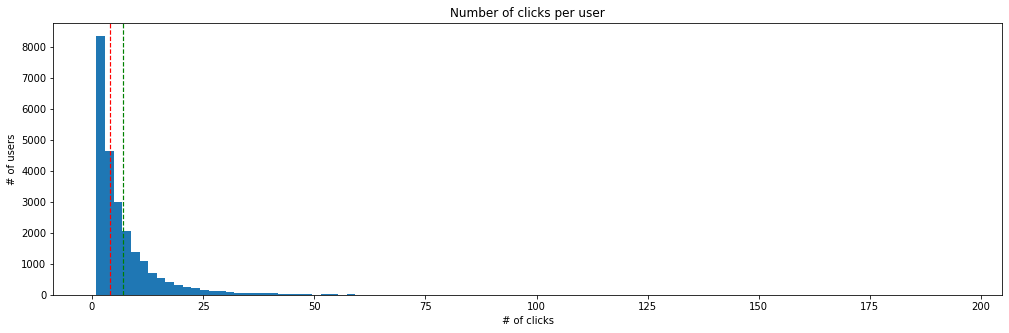

4.0

In [233]:
summary=df2.order.describe()
print(summary)
median=df2.order.median()
print(median)
mean=df2.order.mean()
print(mean)
plt.figure(figsize=(17,5))
plt.title("Number of clicks per user")
plt.xlabel("# of clicks")
plt.ylabel("# of users")
plt.hist(df2.order,bins=100)
plt.axvline(median,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean,color = 'g', linestyle = 'dashed', linewidth = 1.2)
plt.show()
median

### Cutting outliers

4.0
6.8872887704986265


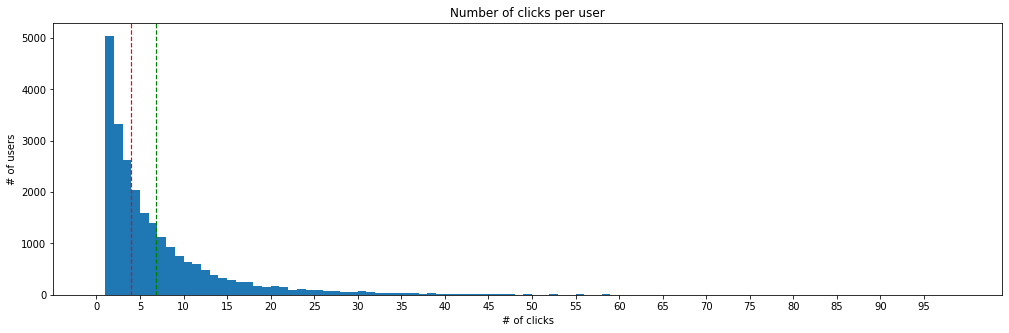

4.0

In [234]:
median=df2.order.median()
print(median)
mean=df2.order.mean()
print(mean)
plt.figure(figsize=(17,5))
plt.title("Number of clicks per user")
plt.xlabel("# of clicks")
plt.ylabel("# of users")
plt.hist(df2.order,bins=list(range(0, 100, 1)))
plt.axvline(median,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean,color = 'g', linestyle = 'dashed', linewidth = 1.2)
plt.xticks(list(range(0, 100, 5)))
plt.show()
median

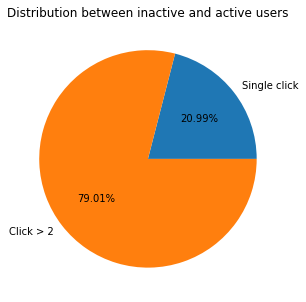

In [59]:
singleclick=df2.loc[df["order"] == 1].count()[0]
multiclicks=df2.loc[df["order"] != 1].count()[0]
singleclick
multiclicks

labels=["Single click","Click > 2"]
plt.figure(figsize=(15,5))
plt.title("Distribution between inactive and active users")
plt.pie([singleclick, multiclicks],labels=labels, autopct = "%.2f%%")
plt.show()

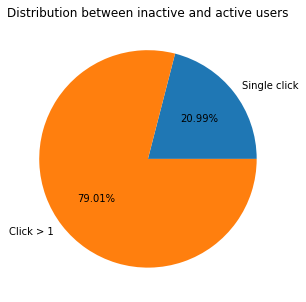

In [60]:
singleclick=df2.loc[df["order"] == 1].count()[0]
multiclicks=df2.loc[df["order"] > 1].count()[0]
singleclick
multiclicks

labels=["Single click","Click > 1"]
plt.figure(figsize=(15,5))
plt.title("Distribution between inactive and active users")
plt.pie([singleclick, multiclicks],labels=labels, autopct = "%.2f%%")
plt.show()

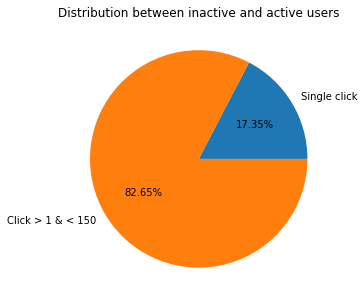

In [61]:

singleclick=df2.loc[df["order"] == 1].count()[0]
multiclicks=df2.loc[df["order"] > 1].count()[0]
multiclicks=df2.loc[ df["order"] < 150].count()[0]
singleclick
multiclicks

labels=["Single click","Click > 1 & < 150"]
plt.figure(figsize=(15,5))
plt.title("Distribution between inactive and active users")
plt.pie([singleclick, multiclicks],labels=labels, autopct = "%.2f%%")
plt.show()

# Identification of different types of users
## Inactive users (click =1)

In [62]:
df3= df2.loc[df2["order"] == 1]
df3

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
29,2008,4,1,1,9,5,3,C21,White,1,1,57,1,2
63,2008,4,1,1,9,11,1,A3,Blue,1,1,72,1,1
74,2008,4,1,1,9,14,1,A41,Brown,2,1,43,2,3
244,2008,4,1,1,29,42,1,A5,Blue,2,1,43,2,1
282,2008,4,1,1,9,46,1,A11,Blue,4,1,62,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165176,2008,8,12,1,29,23998,1,A11,Blue,4,1,62,1,1
165257,2008,8,12,1,29,24002,1,A13,Beige,5,1,28,2,1
165402,2008,8,13,1,29,24016,1,A4,Blue,2,2,38,2,1
165469,2008,8,13,1,29,24024,2,B10,Black,4,1,67,1,1


1659
1451
1170
762


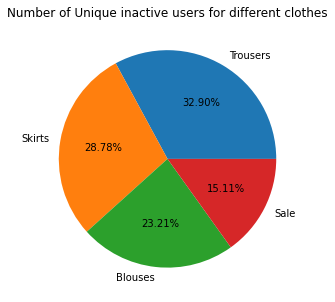

In [82]:
df3['location'].value_counts(normalize =True)
trousers=df3.loc[df3["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df3.loc[df3["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df3.loc[df3["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df3.loc[df3["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique inactive users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

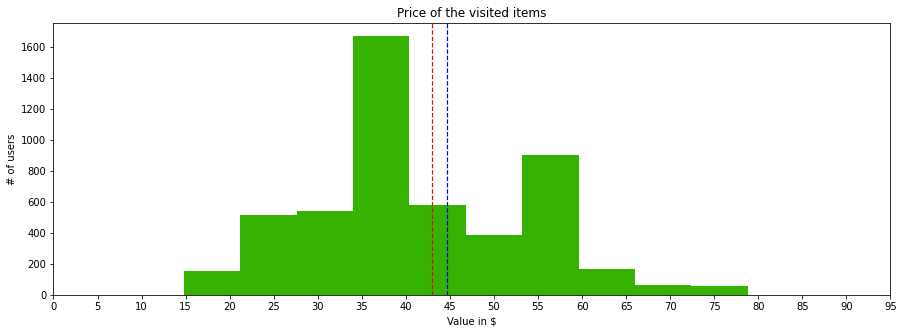

In [235]:
median3=df3.price.median()
mean3=df3.price.mean()

plt.figure(figsize=(15,5))
plt.title("Price of the visited items")
plt.axvline(median3,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean3,color = 'b', linestyle = 'dashed', linewidth = 1.2)
plt.xlabel("Value in $")
plt.ylabel("# of users")
plt.hist(df3["price"],bins= 10,color="#36b300", align="left")
plt.xticks(list(range(0, 100, 5)))

plt.show()

34
27


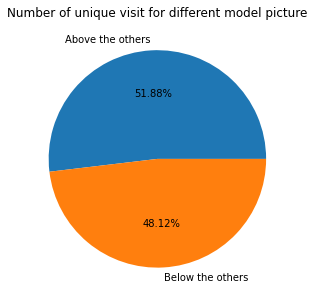

In [246]:
df3['price 2'].value_counts(normalize =True)

above=df3.loc[df3["price 2"] == 1].count()[0]
print (trousers)
below=df3.loc[df3["price 2"] == 2].count()[0]
print(skirt)

labels=["Above the others","Below the others"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([above, below],labels=labels, autopct = "%.2f%%")
plt.show()

34
27


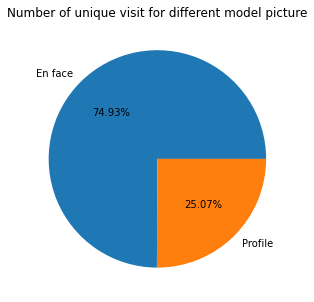

In [245]:
df3['model photography'].value_counts(normalize =True)

enface=df3.loc[df3["model photography"] == 1].count()[0]
print (trousers)
profile=df3.loc[df3["model photography"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

## Slighlty active users (1 < Clicks < 10)

In [201]:
df4= df2.loc[df2["order"] > 1 ]
df4= df4.loc[df4["order"] < 10]
df4

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
8,2008,4,1,9,29,1,4,P82,Gray,4,2,48,1,5
24,2008,4,1,6,21,3,4,P77,Green,2,1,43,1,5
28,2008,4,1,4,21,4,3,C25,Black,3,1,33,2,2
34,2008,4,1,5,9,6,2,B26,Violet,3,1,57,1,2
54,2008,4,1,9,9,8,2,B24,Pink,2,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165453,2008,8,13,5,29,24020,2,B31,Of many colors,5,1,57,1,2
165458,2008,8,13,5,29,24021,1,A17,Black,6,1,62,1,1
165461,2008,8,13,3,29,24022,1,A15,White,5,2,33,2,1
165468,2008,8,13,7,29,24023,4,P13,Brown,5,1,38,1,1


3832
3637
3093
3210


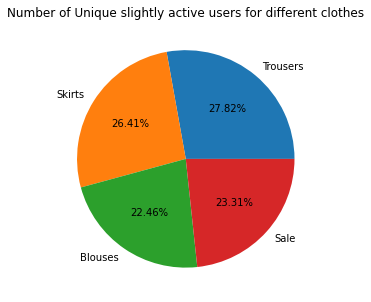

In [202]:
df4['location'].value_counts(normalize =True)
trousers=df4.loc[df4["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df4.loc[df4["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df4.loc[df4["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df4.loc[df4["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique slightly active users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

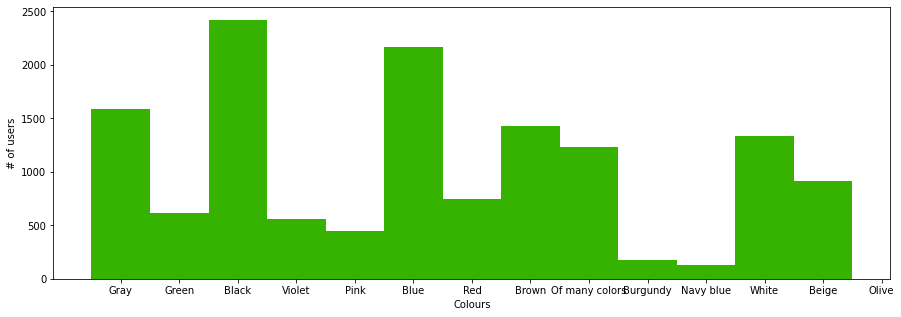

Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64

In [203]:
plt.figure(figsize=(15,5))
plt.xlabel("Colours")
plt.ylabel("# of users")
plt.hist(df4.colour, bins=range(0,14,1), color="#36b300", align="left")
plt.show()
df1['colour'].value_counts(normalize =True)

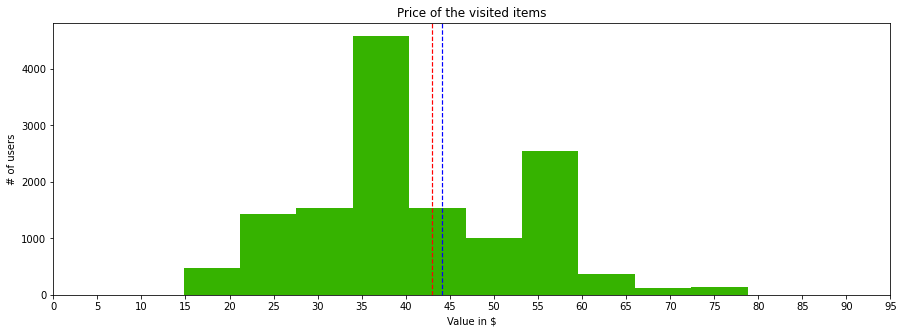

In [236]:
median4=df4.price.median()
mean4=df4.price.mean()

plt.figure(figsize=(15,5))
plt.title("Price of the visited items")
plt.axvline(median4,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean4,color = 'b', linestyle = 'dashed', linewidth = 1.2)
plt.xlabel("Value in $")
plt.ylabel("# of users")
plt.hist(df4["price"],bins= 10,color="#36b300", align="left")
plt.xticks(list(range(0, 100, 5)))

plt.show()


34
27


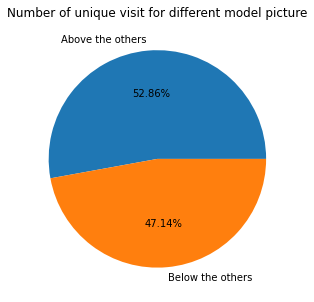

In [247]:
df4['price 2'].value_counts(normalize =True)

above=df4.loc[df4["price 2"] == 1].count()[0]
print (trousers)
below=df4.loc[df4["price 2"] == 2].count()[0]
print(skirt)

labels=["Above the others","Below the others"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([above, below],labels=labels, autopct = "%.2f%%")
plt.show()

34
27


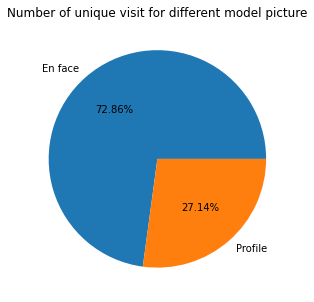

In [248]:
df3['model photography'].value_counts(normalize =True)

enface=df4.loc[df4["model photography"] == 1].count()[0]
print (trousers)
profile=df4.loc[df4["model photography"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

## Active users (10 < Clicks < 30)

In [205]:
df5= df2.loc[df2["order"] > 10]
df5= df5.loc[df5["order"] < 30]
df5

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
45,2008,4,1,11,29,7,2,B4,Olive,2,1,52,1,1
99,2008,4,1,25,21,15,3,C59,Burgundy,2,2,52,1,4
119,2008,4,1,11,9,18,3,C7,Violet,3,1,48,1,1
176,2008,4,1,11,29,30,1,A36,Beige,6,1,33,2,2
188,2008,4,1,12,29,31,3,C46,Black,4,1,48,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165310,2008,8,13,21,29,24009,4,P62,Red,3,2,33,2,4
165324,2008,8,13,11,29,24011,3,C41,Violet,2,1,28,2,3
165398,2008,8,13,11,29,24014,3,C56,Gray,1,2,57,1,4
165431,2008,8,13,27,29,24018,4,P82,Gray,4,2,48,1,5


875
731
942
1351


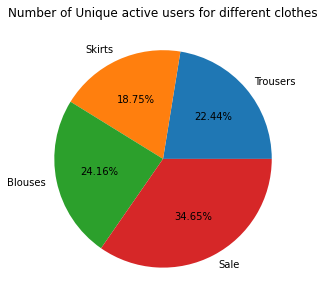

In [206]:
df5['location'].value_counts(normalize =True)
trousers=df5.loc[df5["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df5.loc[df5["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df5.loc[df5["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df5.loc[df5["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique active users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

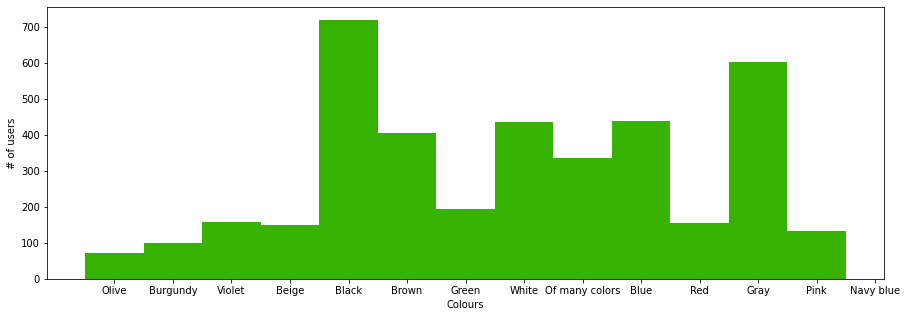

Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64

In [207]:
plt.figure(figsize=(15,5))
plt.xlabel("Colours")
plt.ylabel("# of users")
plt.hist(df5.colour, bins=range(0,14,1), color="#36b300", align="left")
plt.show()
df1['colour'].value_counts(normalize =True)

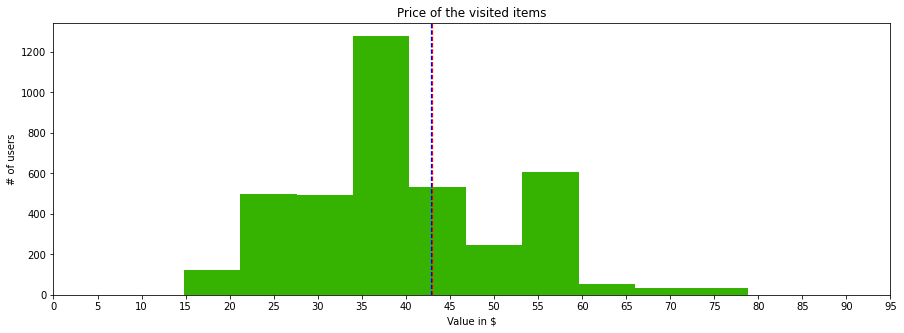

In [259]:
median5=df5.price.median()
mean5=df5.price.mean()

plt.figure(figsize=(15,5))
plt.xlabel("Value in $")
plt.title("Price of the visited items")
plt.axvline(median5,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean5,color = 'b', linestyle = 'dashed', linewidth = 1.2)
plt.ylabel("# of users")
plt.hist(df5["price"],bins= 10,color="#36b300", align="left")
plt.xticks(list(range(0, 100, 5)))

plt.show()

34
27


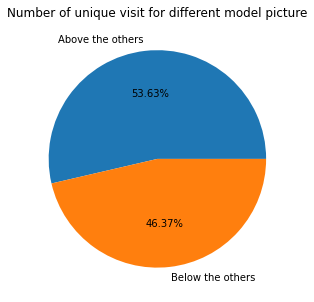

In [249]:
df5['price 2'].value_counts(normalize =True)

above=df5.loc[df5["price 2"] == 1].count()[0]
print (trousers)
below=df5.loc[df5["price 2"] == 2].count()[0]
print(skirt)

labels=["Above the others","Below the others"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([above, below],labels=labels, autopct = "%.2f%%")
plt.show()

34
27


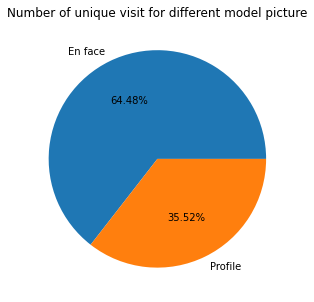

In [250]:
df5['model photography'].value_counts(normalize =True)

enface=df5.loc[df5["model photography"] == 1].count()[0]
print (trousers)
profile=df5.loc[df5["model photography"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

## More active users (30 < Clicks < 50)

In [210]:
df6= df2.loc[df2["order"] > 30]
df6= df6.loc[df6["order"] < 50]
df6

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
331,2008,4,1,41,9,49,1,A42,Gray,2,1,28,2,3
787,2008,4,1,38,29,125,4,P4,Brown,2,1,38,1,1
955,2008,4,1,32,29,157,4,P1,Blue,1,1,38,1,1
1036,2008,4,1,49,34,168,4,P70,Gray,6,2,38,1,4
1198,2008,4,1,44,29,184,4,P67,Of many colors,5,1,38,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163818,2008,8,11,39,29,23798,4,P23,Gray,2,2,28,2,2
164023,2008,8,12,33,24,23834,3,C4,Brown,2,1,48,1,1
164153,2008,8,12,36,29,23846,4,P15,Brown,5,2,38,1,1
164988,2008,8,12,32,29,23963,4,P9,Brown,3,2,23,2,1


108
57
110
180


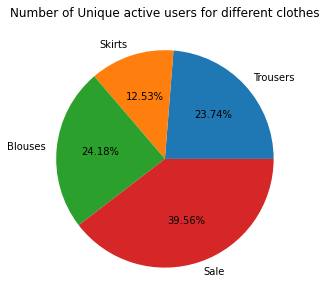

In [211]:
df6['location'].value_counts(normalize =True)
trousers=df6.loc[df6["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df6.loc[df6["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df6.loc[df6["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df6.loc[df6["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique active users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

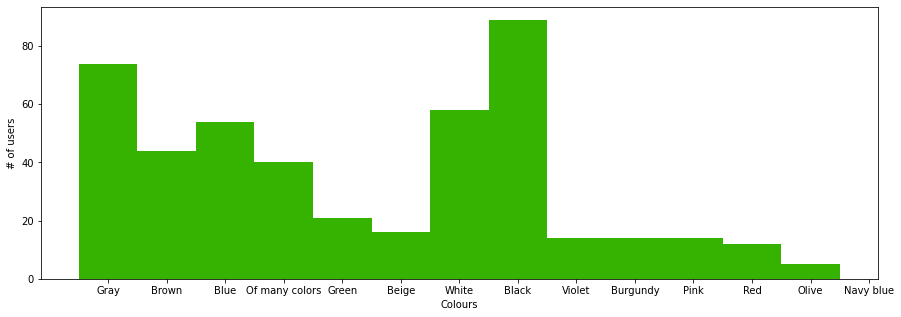

Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64

In [212]:
plt.figure(figsize=(15,5))
plt.xlabel("Colours")
plt.ylabel("# of users")
plt.hist(df6.colour, bins=range(0,14,1), color="#36b300", align="left")
plt.show()
df1['colour'].value_counts(normalize =True)

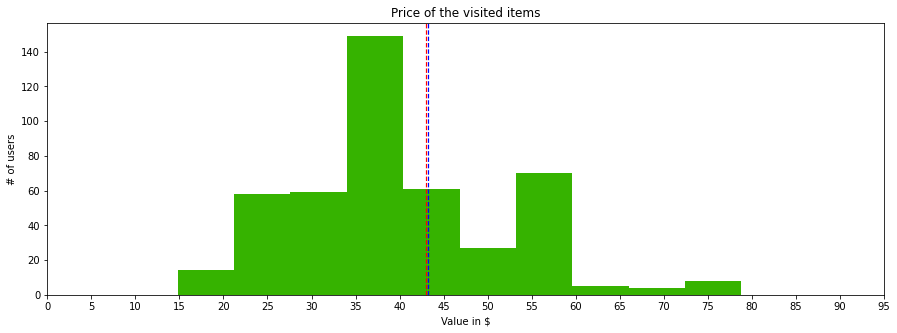

In [239]:
median6=df6.price.median()

mean6=df6.price.mean()

plt.figure(figsize=(15,5))
plt.xlabel("Value in $")
plt.ylabel("# of users")
plt.title("Price of the visited items")
plt.axvline(median6,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean6,color = 'b', linestyle = 'dashed', linewidth = 1.2)
plt.hist(df6["price"],bins= 10,color="#36b300", align="left")
plt.xticks(list(range(0, 100, 5)))

plt.show()

34
27


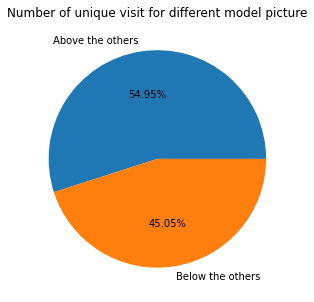

In [251]:
df6['price 2'].value_counts(normalize =True)

above=df6.loc[df6["price 2"] == 1].count()[0]
print (trousers)
below=df6.loc[df6["price 2"] == 2].count()[0]
print(skirt)

labels=["Above the others","Below the others"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([above, below],labels=labels, autopct = "%.2f%%")
plt.show()

34
27


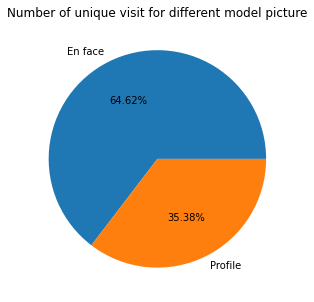

In [252]:
df3['model photography'].value_counts(normalize =True)

enface=df6.loc[df6["model photography"] == 1].count()[0]
print (trousers)
profile=df6.loc[df6["model photography"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

## Extremely active users (50 < Clicks < 200)

In [214]:
df7= df2.loc[df2["order"] > 50]
df7

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
4481,2008,4,2,60,29,638,2,B26,Violet,3,1,57,1,2
5625,2008,4,2,58,29,827,1,A18,Brown,6,1,38,2,1
6540,2008,4,2,51,29,948,4,P63,White,3,2,28,2,4
7837,2008,4,3,55,29,1134,4,P48,Of many colors,4,2,33,2,3
9203,2008,4,4,58,34,1338,2,B31,Of many colors,5,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160311,2008,8,8,75,29,23329,1,A37,Black,1,1,62,1,3
160834,2008,8,9,108,9,23383,3,C7,Violet,3,1,48,1,1
162333,2008,8,10,89,29,23585,4,P6,Black,2,1,43,1,1
164589,2008,8,12,70,34,23904,3,C31,Red,5,1,33,2,2


34
27
34
41


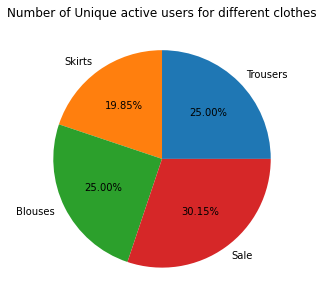

In [215]:
df7['location'].value_counts(normalize =True)
trousers=df7.loc[df7["page 1 (main category)"] == 1].count()[0]
print (trousers)
skirt=df7.loc[df7["page 1 (main category)"] == 2].count()[0]
print(skirt)
blouses=df7.loc[df7["page 1 (main category)"] == 3].count()[0]
print(blouses)
sale=df7.loc[df7["page 1 (main category)"] == 4].count()[0]
print(sale)

labels=["Trousers","Skirts","Blouses","Sale"]
plt.figure(figsize=(15,5))
plt.title("Number of Unique active users for different clothes")
plt.pie([trousers, skirt,blouses,sale],labels=labels, autopct = "%.2f%%")
plt.show()

### One of the clearer trend that is possible to identify is the provided by the attitude of more active users to be more focused on sale products, reflecting the hipothetical willigness to find lower prices.

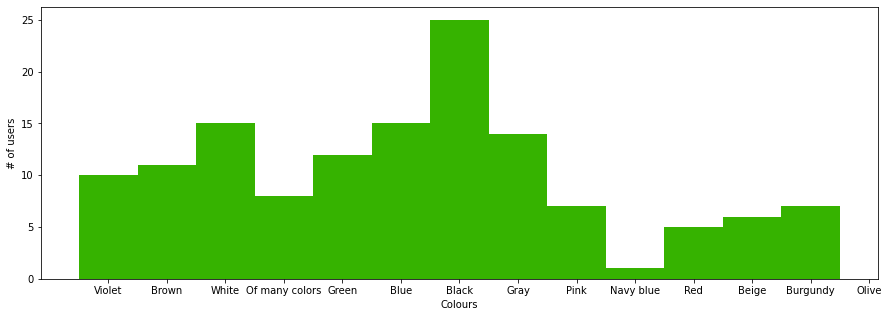

Blue              0.239366
Black             0.164572
Brown             0.094856
Gray              0.075543
White             0.074960
Red               0.060226
Of many colors    0.058312
Navy blue         0.052318
Beige             0.048780
Olive             0.036003
Green             0.033172
Violet            0.029801
Pink              0.029093
Burgundy          0.002997
Name: colour, dtype: float64

In [216]:
plt.figure(figsize=(15,5))
plt.xlabel("Colours")
plt.ylabel("# of users")
plt.hist(df7.colour, bins=range(0,14,1), color="#36b300", align="left")
plt.show()
df1['colour'].value_counts(normalize =True)

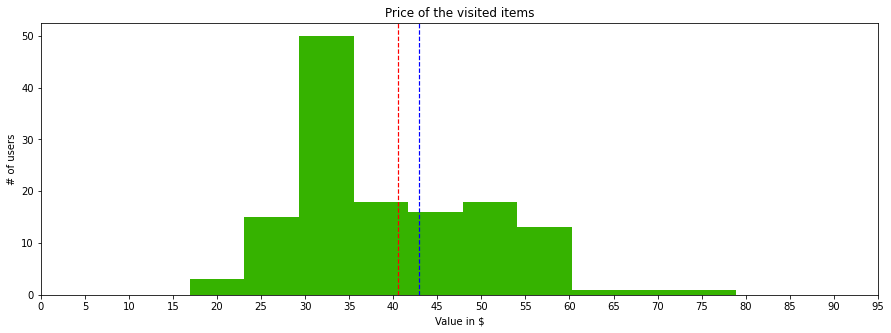

In [240]:
median7=df7.price.median()
mean7=df7.price.mean()

plt.figure(figsize=(15,5))
plt.title("Price of the visited items")
plt.xlabel("Value in $")
plt.ylabel("# of users")
plt.hist(df7["price"],bins= 10,color="#36b300", align="left")
plt.axvline(median7,color = 'r', linestyle = 'dashed', linewidth = 1.2)
plt.axvline(mean7,color = 'b', linestyle = 'dashed', linewidth = 1.2)
plt.xticks(list(range(0, 100, 5)))

plt.show()

34
27


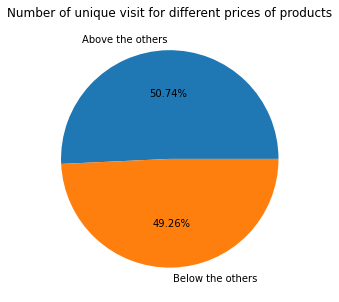

In [256]:
df7['price 2'].value_counts(normalize =True)

above=df7.loc[df7["price 2"] == 1].count()[0]
print (trousers)
below=df7.loc[df7["price 2"] == 2].count()[0]
print(skirt)

labels=["Above the others","Below the others"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different prices of products")
plt.pie([above, below],labels=labels, autopct = "%.2f%%")
plt.show()

### However, it is not possible to identify the same trend nor on prices or prices categories. This may be leaded by the fact that, even though the products are on sale, the prices are in line with the other items that are not on sale.

34
27


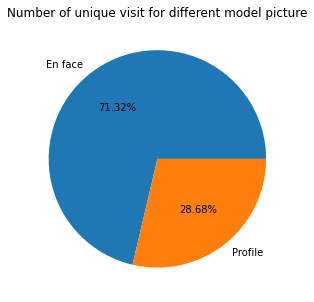

In [255]:
df7['model photography'].value_counts(normalize =True)

enface=df7.loc[df7["model photography"] == 1].count()[0]
print (trousers)
profile=df7.loc[df7["model photography"] == 2].count()[0]
print(skirt)

labels=["En face","Profile"]
plt.figure(figsize=(15,5))
plt.title("Number of unique visit for different model picture")
plt.pie([enface, profile],labels=labels, autopct = "%.2f%%")
plt.show()

### The end! Thank you for your attention :)